# Title

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, r2_score
import tensorflow as tf
from sklearn.preprocessing  import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator
print(tf.__version__)


2.15.0


### Create data

In [12]:
def f(X):
    """
    input: x
    output: y = 0.7x - 42(56)
    """
    return 0.7*X - 42

N = 100
noise_level = 1.2
X = np.linspace(150, 199, N)
np.random.shuffle(X)
Y = f(X) + np.random.randn(N) * noise_level

### Analyze data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


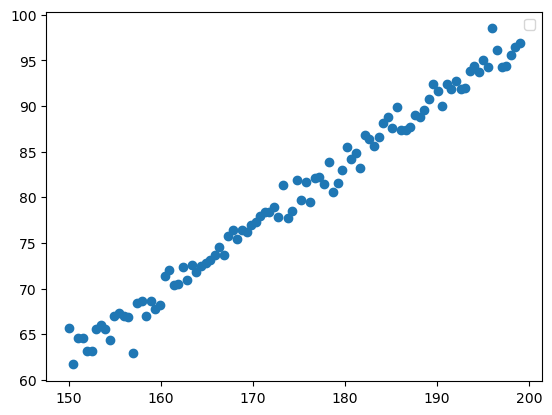

In [13]:
plt.scatter(X,Y)
plt.legend()

### Data preprossiong. Normalization

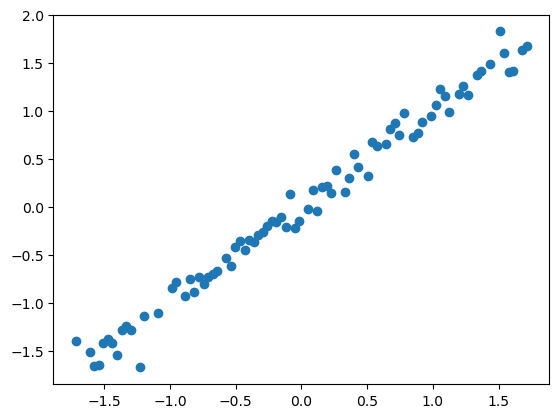

In [48]:

scatter_x = StandardScaler()
scatter_y = StandardScaler()
n_X =  scatter_x.fit_transform(X.reshape(-1,1))
n_Y =  scatter_y.fit_transform(Y.reshape(-1,1))
train_X, valid_X, train_y, valid_y = train_test_split(n_X, n_Y, test_size=0.2, random_state=0)
plt.scatter(train_X, train_y)

### Build the leaner regression model. Find the best w and b

In [67]:

# setup
    # loss function. MSE
    #  initial w,b. random

    # foreach loop
        # get the gradient and get the new w,b

class MyLinearRegression(BaseEstimator):
    def __init__(self, max_iter, learning_rate = 0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate 
        self.w = 0
        self.b = 0

    def fit(self, X, y):
        w = tf.Variable(np.random.randn(), name = "w")
        b = tf.Variable(np.random.randn(), name = "b")

        for i in range(self.max_iter):
            with tf.GradientTape(persistent=True, watch_accessed_variables=True) as tape:                
                f =  self.__loss_function(y,self.__lr_forward(X, w, b))

            [gradient_w, gradient_b] = tape.gradient(f, [w,b])
            w.assign_sub( self.learning_rate * gradient_w)
            b.assign_sub(self.learning_rate * gradient_b)
            loss = self.__loss_function(y, self.__lr_forward(X, w, b))
            print("loss : ", loss.numpy())

        self.w = w
        self.b = b
    def print_coefficients(self):
        print(f'w={self.w}, b={self.b}')
        
    def __loss_function(self, y, y_pred):
        return tf.reduce_mean(tf.square(y- y_pred))
    
    def __lr_forward(self, x, w, b):
        return w* x + b
    
    def predict(self, X):        
        y_pred = self.__lr_forward(X.reshape(-1,1), self.w, self.b)        
        return y_pred
    
    def r2_score(self, X, y):
        pred = self.predict(X)
        return r2_score(y, pred)
    
model = MyLinearRegression(100, 0.01)
model.fit(train_X, train_y)
print(model.r2_score(valid_X, valid_y))


loss :  1.4174852
loss :  1.3628118
loss :  1.3102703
loss :  1.2597773
loss :  1.2112528
loss :  1.16462
loss :  1.1198053
loss :  1.0767378
loss :  1.0353489
loss :  0.9955735
loss :  0.9573485
loss :  0.92061365
loss :  0.88531035
loss :  0.8513832
loss :  0.8187782
loss :  0.7874441
loss :  0.7573311
loss :  0.7283915
loss :  0.7005799
loss :  0.67385185
loss :  0.6481655
loss :  0.62347996
loss :  0.59975624
loss :  0.57695687
loss :  0.5550458
loss :  0.5339884
loss :  0.5137514
loss :  0.49430275
loss :  0.47561178
loss :  0.45764893
loss :  0.44038582
loss :  0.42379507
loss :  0.40785056
loss :  0.39252716
loss :  0.37780052
loss :  0.36364746
loss :  0.35004562
loss :  0.3369735
loss :  0.32441035
loss :  0.3123365
loss :  0.30073285
loss :  0.289581
loss :  0.27886337
loss :  0.2685631
loss :  0.2586638
loss :  0.24914996
loss :  0.24000649
loss :  0.23121901
loss :  0.22277364
loss :  0.214657
loss :  0.20685633
loss :  0.19935927
loss :  0.19215406
loss :  0.1852293
loss :

### Train model

### Evaluate model

### Predit on test dataset


### Output

In [1]:

# df = pd.DataFrame()
# df.to_csv('submission.csv',index = False, header=True)